<a href="https://colab.research.google.com/github/Zobiya-Jumani21/Machine-Learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**extart the dataset from colab into code**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('heart.csv')
df.head()


clean the data and see outliers or null values

In [ ]:
df.info()

In [ ]:
df.describe() #this will show mean, median, SD
df.columns

In [ ]:
df.isnull().sum() # for missing values

In [ ]:
df.shape # shows rows and column

In [ ]:
df['target'].value_counts()

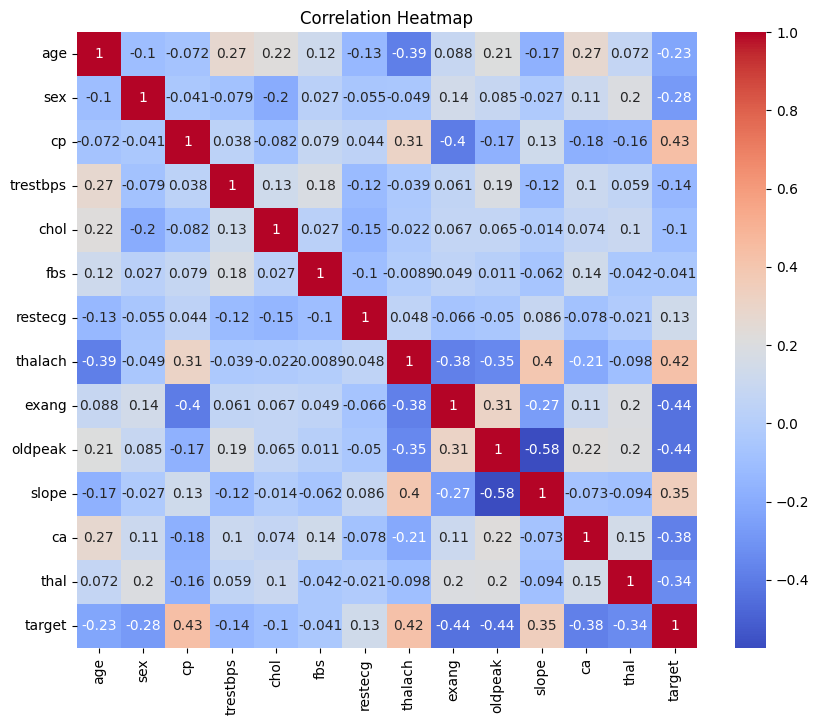

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.countplot(x='sex', hue='target', data=df)

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Count (0 = No, 1 = Yes)')
plt.show()

In [ ]:
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title('Age vs Heart Disease')
plt.show()

I, for train three diffrent model on all features and than choose the some features and compare the results. Time for split the data and train the model
**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

In [ ]:
# pred the model
y_pred = log_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [ ]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


# Predict on test data
y_pred_dt = dt_model.predict(X_test)



In [ ]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", round(accuracy_dt * 100, 2), "%")

In [45]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [47]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree")
plt.show()

random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

In [43]:
# 4. Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_rf * 100, 2), "%")

Accuracy: 98.54 %


In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Confusion Matrix:
[[102   0]
 [  3 100]]


In [46]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Now I will go with feature Engineering and select the main features according to HeatMap and train the model and compare the result.
Use only the features with absolute correlation ≥ 0.3: from the heatmap


In [50]:
selected_features = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal']
X_selected = df[selected_features]
y = df['target']

In [51]:

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)



Logistic Regression

In [58]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_sel, y_train_sel)

# Step 3: Make predictions
y_pred_sel = log_model.predict(X_test_sel)

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_sel, y_pred_sel))

Confusion Matrix:
[[74 28]
 [13 90]]


In [60]:
print("\nClassification Report:")
print(classification_report(y_test_sel, y_pred_sel))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [61]:
print("\nAccuracy Score:", accuracy_score(y_test_sel, y_pred_sel))


Accuracy Score: 0.8


decision Tres Classifier

In [65]:
# Initialize the model
dt_model_sel = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_sel.fit(X_train_sel, y_train_sel)

# Predict on test data
y_pred_dt = dt_model_sel.predict(X_test_sel)

In [67]:
accuracy_dt = accuracy_score(y_test_sel, y_pred_dt)
print("Accuracy:", round(accuracy_dt * 100, 2), "%")





Accuracy: 97.07 %


In [70]:
# Confusion matrix
cm_dt = confusion_matrix(y_test_sel, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

Confusion Matrix:
 [[102   0]
 [  6  97]]


In [71]:
# Classification report
print("Classification Report:\n", classification_report(y_test_sel, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



Random Forest

In [72]:
# 1. Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(X_train_sel, y_train_sel)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test_sel)

In [73]:
# 4. Evaluate accuracy
accuracy_rf = accuracy_score(y_test_sel, y_pred_rf)
print("Accuracy:", round(accuracy_rf * 100, 2), "%")




Accuracy: 98.54 %


In [75]:
# 5. Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test_sel, y_pred_rf))

Confusion Matrix:
[[102   0]
 [  3 100]]


In [77]:
print("\nClassification Report:")
print(classification_report(y_test_sel, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

